SegFormer-ft on ATR Dataset
====


**SegFormer: Simple and Efficient Design for Semantic Segmentation with Transformers**
 * Original SegFormer paper: https://arxiv.org/abs/2105.15203

![SegFormer](../assets/segformer_overview.png)

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from transformers import SegformerImageProcessor
from transformers import AutoModelForSemanticSegmentation


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
processor = SegformerImageProcessor.from_pretrained(
    "mattmdjaga/segformer_b2_clothes"
)
model = AutoModelForSemanticSegmentation.from_pretrained(
    "mattmdjaga/segformer_b2_clothes"
)

model.eval().to(device);

/home/pyml/anaconda3/envs/py311/lib/python3.11/site-packages/transformers/utils/deprecation.py:172: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


In [4]:
image_path = "../samples/person.jpg"
image = Image.open(image_path).convert("RGB")
print(image.size)

inputs = processor(images=image, return_tensors="pt").to(device)

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]
print(pred_seg.shape)


(438, 640)
torch.Size([640, 438])


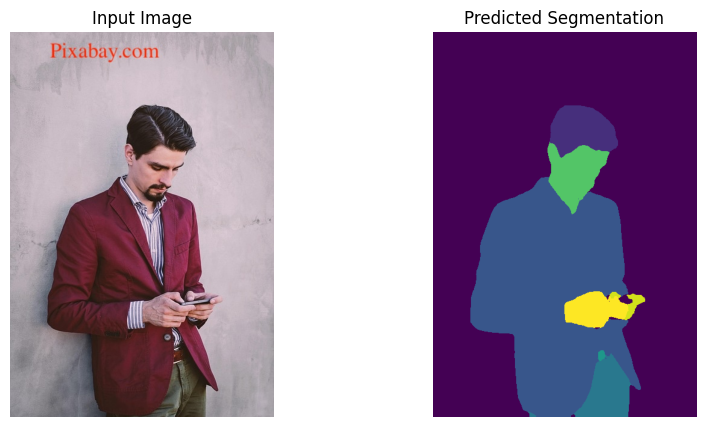

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Input Image")
axes[1].imshow(pred_seg)
axes[1].set_title("Predicted Segmentation")
axes[0].axis("off")
axes[1].axis("off")
plt.show()
